In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

dataset=pd.read_csv(r'C:\Users\ACER\Downloads\ElectricCarData_Clean.csv')
dataset.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [36]:
dataset.shape

(103, 14)

In [37]:
dataset.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [38]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
AccelSec,103.0,7.396117,3.017430,2.1,5.1,7.3,9.0,22.4
TopSpeed_KmH,103.0,179.194175,43.573030,123.0,150.0,160.0,200.0,410.0
Range_Km,103.0,338.786408,126.014444,95.0,250.0,340.0,400.0,970.0
Efficiency_WhKm,103.0,189.165049,29.566839,104.0,168.0,180.0,203.0,273.0
Seats,103.0,4.883495,0.795834,2.0,5.0,5.0,5.0,7.0
PriceEuro,103.0,55811.563107,34134.665280,20129.0,34429.5,45000.0,65000.0,215000.0


In [39]:
dataset.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

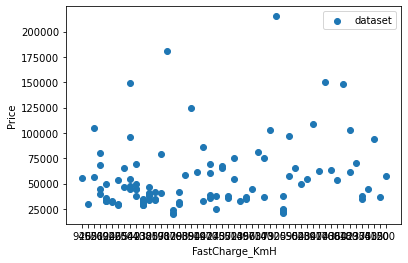

In [40]:
plt.scatter(dataset.FastCharge_KmH, dataset.PriceEuro, marker='o', label='dataset')
plt.xlabel('FastCharge_KmH')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
#split data train dan test untuk training model
train = dataset.head(56)
test = dataset.tail(11)

In [42]:
x_train=train['FastCharge_KmH'].values
y_train=train['PriceEuro'].values

x_test=test['FastCharge_KmH'].values
y_test=test['PriceEuro'].values

print(x_train)

['940' '250' '620' '560' '190' '620' '220' '420' '650' '540' '440' '230'
 '380' '650' '210' '590' '780' '170' '260' '260' '420' '930' '230' '850'
 '910' '560' '490' '470' '270' '380' '450' '350' '230' '710' '240' '390'
 '190' '570' '230' '440' '560' '210' '610' '170' '170' '340' '210' '730'
 '540' '350' '590' '920' '390' '560' '490' '190']


In [43]:
np.seterr(all='warn')
x_train = np.array(x_train ,dtype='float64')
n = len(x_train)

xy_sum=0
y_sum=0
y_kuadrat_sum=0
x_sum=0
x_kuadrat_sum=0

for i in range(n):
    xy_sum += x_train[i]*y_train[i]
    y_sum += y_train[i]
    y_kuadrat_sum += y_train[i]**2
    x_sum += x_train[i]
    x_kuadrat_sum += x_train[i]**2
    
a = (y_sum*x_kuadrat_sum - x_sum*xy_sum)/(n*x_kuadrat_sum - x_sum**2)
b = (n*xy_sum - x_sum*y_sum)/(n*x_kuadrat_sum - x_sum**2)

print('a = ',a)
print('b = ',b)

a =  4941.2954559884865
b =  112.60211115579166


In [44]:
x = np.linspace (np.min(x_train), np.max(x_train))
y = a + b * x
mean_yp = np.mean(a + b * x_train)

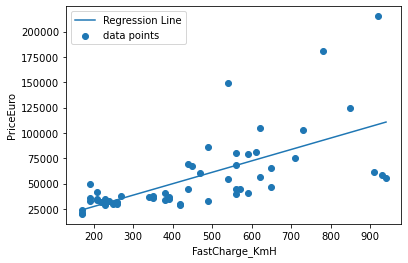

In [45]:
plt.plot(x, y, label='Regression Line')
plt.scatter(x_train, y_train, label='data points')

plt.xlabel('FastCharge_KmH')
plt.ylabel('PriceEuro')
plt.legend()
plt.show()

In [46]:
r = ((x_sum*y_sum)-(n*xy_sum))/math.sqrt(((n*x_kuadrat_sum)-(x_sum**2))*((n*y_kuadrat_sum)-(y_sum**2)))
r2 = abs(r)**2

In [47]:
SSR = 0
SST = 0

mean_x=np.mean(x_train)
mean_y=np.mean(y_train)
mean_y_test=np.mean(y_test)

for i in range(len(x_train)):
  SST += (y_train[i] - mean_y) ** 2
  SSR += ((a + b * x_train[i]) - mean_yp)** 2

In [48]:
convertedArray = x_test.astype(np.float)
y_pred = a + b * convertedArray
mean_ypred = np.mean(y_pred)

In [49]:
SSR = 0
SST = 0 
for i in range(len(convertedArray)):
  SST+= (y_test[i] - mean_y_test) ** 2
  SSR += ((a + b * convertedArray[i]) - mean_ypred) ** 2
r2_test = SSR/SST
print(r2_test)

0.32817534237105417
